### Angle between Vectors

#### Set 1

In [8]:
'''
SET–1 : Angle Between Vectors (Foundations & Intuition)

Q1. What does the angle between two vectors represent?
Ans. The angle between two vectors tells how similar their directions are,
ignoring their sizes.
'''
# Example
v = [1, 1]
u = [2, 2]
# Both point in the same direction → angle = 0° (high similarity)


'''
Q2. Why is angle more important than vector length for similarity?
Ans. Because length shows strength, but angle shows meaning or direction.
'''
# Example
v = [1, 1]
u = [10, 10]
# Lengths are different, but angle is 0° → same meaning


'''
Q3. What does a small angle between vectors indicate?
Ans. A small angle means vectors point almost the same way, so they are very similar.
'''
# Example
v = [1, 0]
u = [0.9, 0.1]
# Small angle → high similarity


'''
Q4. What does a 90° angle between vectors mean?
Ans. A 90° angle means vectors are unrelated and have no similarity.
'''
# Example
v = [1, 0]
u = [0, 1]
# Angle = 90° → cos(θ) = 0 → no similarity


'''
Q5. What does an angle greater than 90° indicate?
Ans. It means vectors point in opposite directions and represent opposite meaning.
'''
# Example
v = [1, 0]
u = [-1, 0]
# Angle = 180° → completely opposite directions


'''
Q6. How is the angle between vectors computed conceptually?
Ans. Angle is inferred using the dot product divided by vector lengths.
This removes size and keeps direction.
'''
# Example
# cos(θ) = (v · u) / (‖v‖ ‖u‖)
v = [1, 1]
u = [1, 0]
# Dot product + normalization gives angle information


#### Set 2

In [9]:
'''
SET–2 : Angle Between Vectors (AI, Embeddings & Meaning)

Q1. Why is angle used instead of distance in many AI systems?
Ans. Angle captures meaning (direction), while distance is affected by magnitude.
'''
# Example
v = [100, 100]
u = [1, 1]
# Distance is large, but angle = 0° → same meaning


'''
Q2. What is cosine similarity and how is it related to angle?
Ans. Cosine similarity is the cosine of the angle between two vectors.
It directly measures semantic similarity.
'''
# Example
# cosine_similarity(v, u) = cos(θ)
v = [1, 0]
u = [1, 0]
# cos(θ) = 1 → identical meaning


'''
Q3. Why do embeddings use cosine similarity instead of raw dot product?
Ans. Because cosine similarity removes the effect of vector length
and compares direction only.
'''
# Example
v = [2, 2]
u = [10, 10]
# Dot product is large, but cosine similarity = 1 (same meaning)


'''
Q4. How does angle help in understanding word or sentence embeddings?
Ans. Smaller angle means closer meaning between words or sentences.
'''
# Example
king  = [0.8, 0.6]
queen = [0.79, 0.61]
# Small angle → similar semantic meaning


'''
Q5. How is angle used in attention mechanisms?
Ans. Attention uses cosine-like behavior to check how relevant one token is to another.
Smaller angle → higher attention.
'''
# Example
query = [0.7, 0.3]
key   = [0.6, 0.4]
# Small angle → high relevance score


'''
Q6. What is the key mental model to remember for norm vs angle?
Ans. Norm shows strength, angle shows meaning.
'''
# Example
v = [5, 0]
u = [1, 0]
# Norms differ, angle same → same meaning


### Code for Angle

In [10]:
import numpy as np
from numpy.linalg import norm

v = np.array([1, 1])
u = np.array([2, 2])

cos_theta = (v @ u) / (norm(v) * norm(u))
print(cos_theta)  # 1.0, meaning angle = 0°, vectors point in same direction

0.9999999999999998


## Length vs Angle

In [11]:
# Length:
# Length shows strength of the vector.

# Angle:
# Angle shows direction/meaning of the vector.

v = np.array([2, 3])
u = np.array([4, 6]) # if you observe this is just double of v

length_v = norm(v)  # ≈ 3.60555
length_u = norm(u)  # ≈ 7.21110

angle_cosine = (v @ u) / (length_v * length_u)  # 1.0, meaning angle = 0°

# Length shows that u is stronger than v (longer vector).
# Angle cosine shows that both point in the same direction (same meaning).

# Points to lock it in memory:
# 📌 Length = strength
# 📌 Angle = meaning
# 📌 Vectors with same angle but different lengths have same meaning but different strengths

### (or) Distance vs Angle

In [12]:
# 📌 Distance misleads when magnitude differs
# 📌 Angle captures semantics

### Angles : <90, >90, =90

In [13]:
# Angle: <90° → similar meaning
# Angle: =90° → no meaning relation
# Angle: >90° → opposite meaning

### Cosine Simalirity

In [14]:
v = np.array([1, 0])
u = np.array([1, 0])

cos_sim = (v @ u) / (norm(v) * norm(u))
print(cos_sim)   # 1.0


# Cosine Similarity tells:
# "Are these vectors pointing in the same direction?"

# It does NOT care how long the arrows are
# It only cares about the ANGLE between them

# Same direction        → similarity = 1
# Perpendicular (90°)   → similarity = 0
# Opposite direction    → similarity = -1

1.0


### Cosine Similarity (understand with RAG example)

In [16]:
# 1. Stored Documents and question as ARROWS (vectors)
'''
User Question  →  converted to a vector (arrow)
Documents      →  already stored as vectors (arrows)
'''


# 2. Compare angle between question vector and document vectors
'''
Each document chunk is converted into an embedding vector.

Doc A: "How to reset a password"        → arrow points east
Doc B: "Database indexing techniques"  → arrow points north
Doc C: "Forgot login credentials"      → arrow points east

They are NOT words anymore — they are directions of meaning.
'''


# User Query as an arrow (vector)
'''
Query: "I can’t log in to my account"

This query is also converted into a vector → another arrow.
This is called the query embedding.
You can now compare angles between this query vector and document vectors.

This appears to be directionally similar to Doc A and Doc C,
which also talk about login issues.
'''


# Cosine Similarity asks this question:
cs = '''
“Which document arrow points in the SAME DIRECTION as my query arrow?”

Here, direction means SIMILAR MEANING.
Here, the Doc A and Doc C arrows point in a similar direction to the query arrow,
indicating they share similar meaning about login issues.
'''


### Why cosine similarity works so well in RAG ?

In [17]:
# cos_sim = cos(angle_between(query_vector, doc_vector))

# Small angle  → similar meaning  → high cosine score
# Large angle  → different topic  → low cosine score

# Eg.
# Even if words differ, meaning can be similar if angles are small. that is our main thing.

# Doc text: "Reset your credentials"
# Query:    "I forgot my password"

# Even though words differ, both talk about login issues.
# Their vectors will have a small angle → high cosine similarity score.

### Consise Visuals

In [ ]:
# Embedding space ≈ meaning space
# Vectors ≈ intent directions
# Cosine similarity ≈ intent alignment

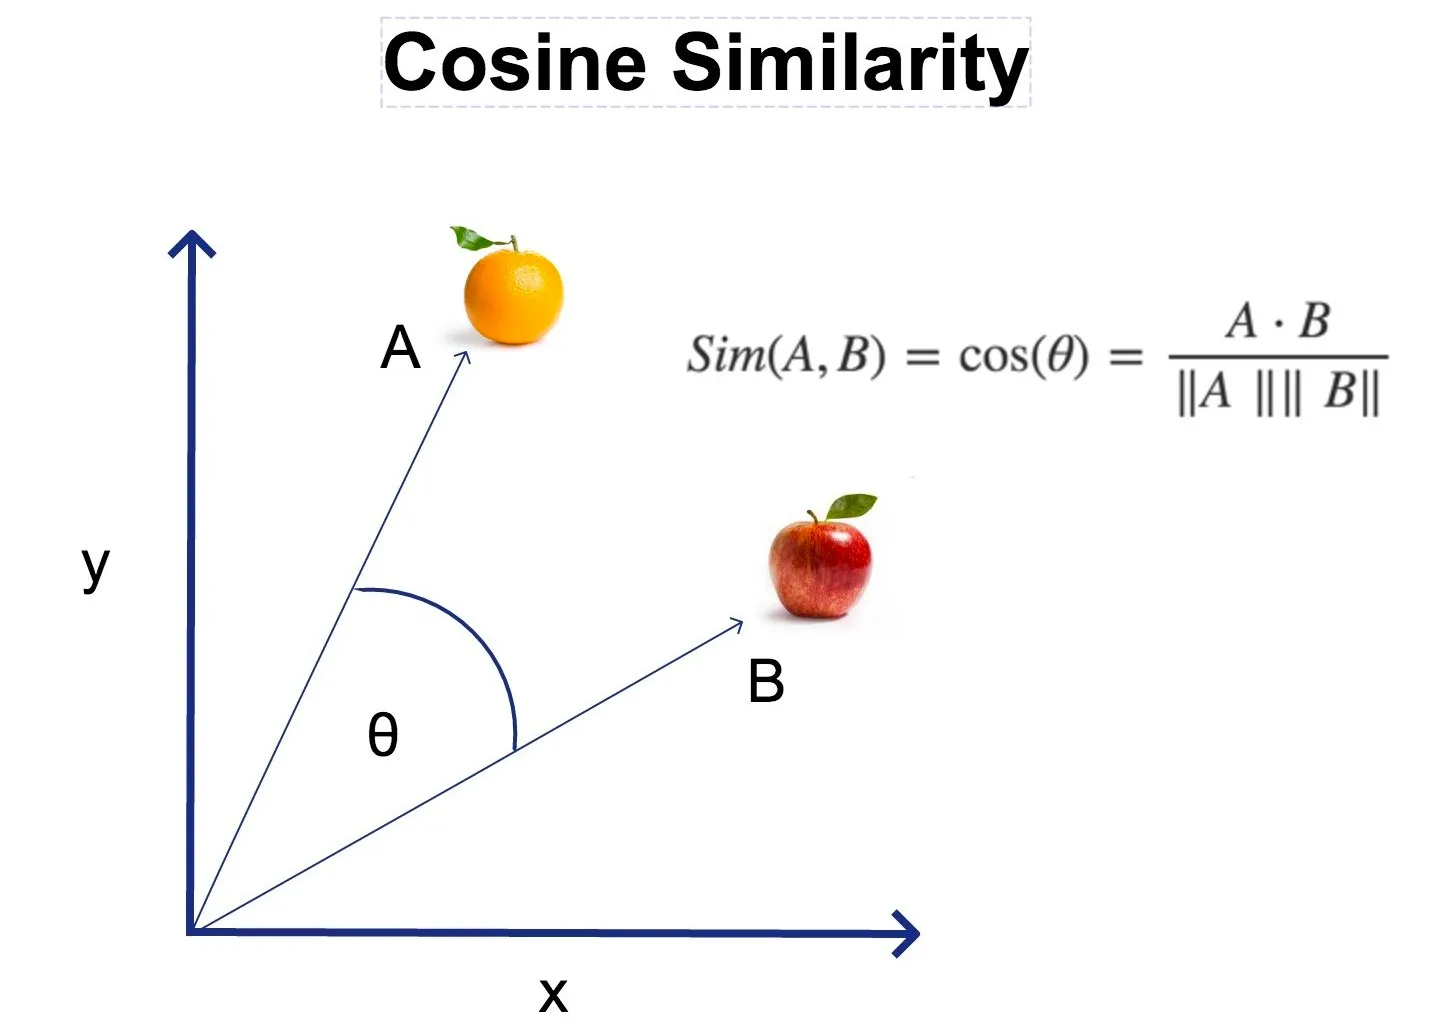